In [18]:

library(car)
library(ggplot2)
library(scales)
library(repr)
library(forecast)

options(scipen=999)

# Change plot size to 10 x 6
options(repr.plot.width=8, repr.plot.height=5)

arb_data <- read.csv2("arblosa_87_02.csv")
arb_data$Month <- sapply(arb_data$Month, FUN = function(x) { ifelse( length(x) == 2, x, paste("0", x, sep = ""))})
arb_data$Date <- paste(arb_data$Year,arb_data$Month, "01", sep = "-")
arb_data$Date <- as.Date(arb_data$Date, format = "%Y-%m-%d")
head(arb_data)

,Year,Month,Value,Part,Date
1,1993,01,322,7.5,1993-01-01
2,1993,02,315,7.3,1993-02-01
3,1993,03,302,7.1,1993-03-01
4,1993,04,329,7.7,1993-04-01
5,1993,05,322,7.5,1993-05-01
6,1993,06,402,9,1993-06-01


Plotta observerad data

Warning message:
: Removed 30 rows containing missing values (geom_path).

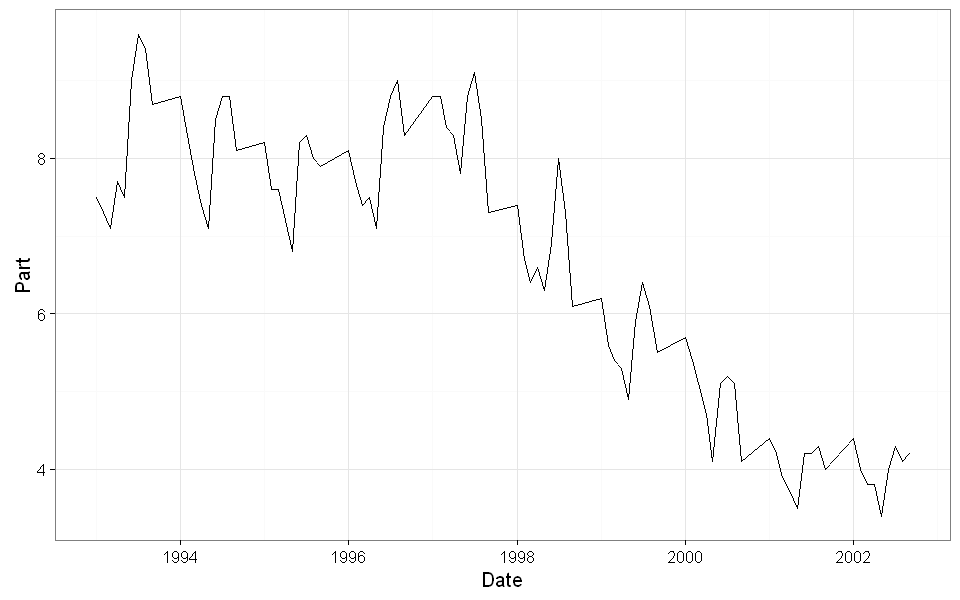

In [19]:
ggplot(arb_data, aes(group = 1)) +
    geom_line(aes(x = Date, y = Part)) +
    theme_bw()

Holt-Winters


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(x = arb_ts, h = 12, seasonal = "additive", alpha = 0.75, beta = 0.1,  

 Call:
     gamma = 0.2) 

  Smoothing parameters:
    alpha = 0.75 
    beta  = 0.1 
    gamma = 0.2 

  Initial states:
    l = 7.5026 
    b = 0.2166 
    s=-0.1546 -0.5211 -0.3678 0.058 0.678 0.871
           0.3525 -0.6562 -0.3305 -0.1383 -0.0191 0.2281

  sigma:  0.3104

     AIC     AICc      BIC 
319.7112 323.1452 355.9486 

Error measures:
                      ME      RMSE       MAE         MPE     MAPE      MASE
Training set -0.01311582 0.3103827 0.2472813 -0.08878342 4.112235 0.3372018
                   ACF1
Training set 0.04553452

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2003       4.832615 4.434843 5.230386 4.224276 5.440954
Feb 2003       4.478113 3.929462 5.026763 3.639024 5.317202
Mar 2003       4.266466 3.576932 4.956000 3.211914 5.321018
Apr 2003       

Warning message:
: Removed 30 rows containing missing values (geom_path).Warning message:
: Removed 30 rows containing missing values (geom_path).

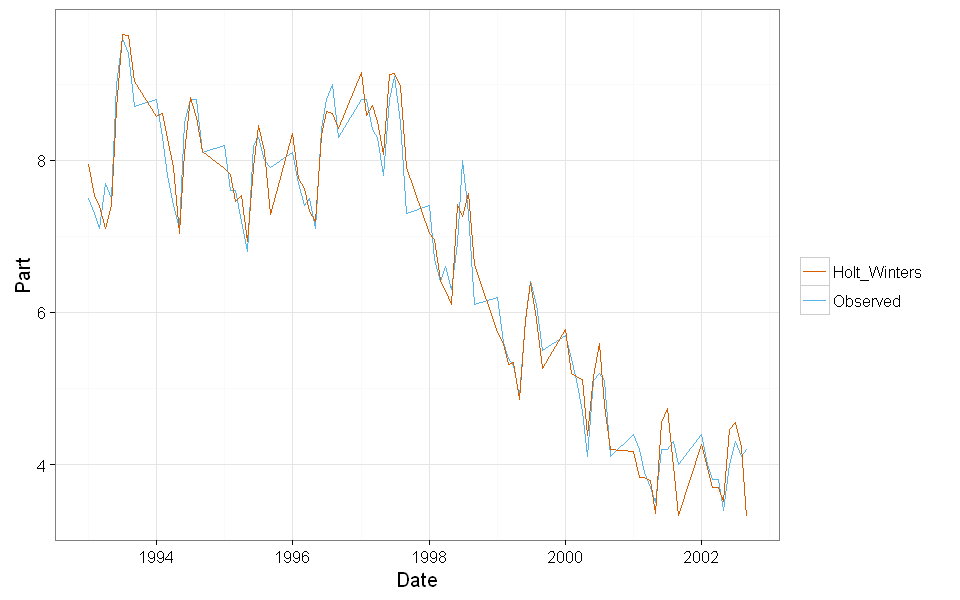

In [170]:
#help(holt)
arb_ts <- ts(arb_data$Part, start=c(1993, 01), end=c(2002, 12), frequency=12)
hw_model <- hw(arb_ts, h = 12, seasonal = "additive", alpha = 0.75, beta = 0.1, gamma = 0.2)
summary(hw_model)
arb_data$HoltWinters_Fit <- hw_model$fitted
arb_data$Resiudals <- arb_data$Part - hw_model$fitted


ggplot(arb_data, aes()) +
    geom_line(aes(x = Date, y = Part, color="Observed")) +
    geom_line(aes(x = Date, y = HoltWinters_Fit, color="Holt_Winters")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Holt_Winters="#D55E00")) +
    theme_bw()

Om jag låter R välja:
Smoothing parameters:
    alpha = 0.8865 
    beta  = 0.0001 
    gamma = 0.0001
    
    MAPE: 3.494051
    
Mitt val:
    Smoothing parameters:
    alpha = 0.75 
    beta  = 0.1 
    gamma = 0.2 
    
    MAPE: 4.112235
    
Men att ha alpha så högt, samt beta/gamma så lågt kan ju inte vara rimligt..
Ska man kolla hur rimligt det är utöver MAPE?

Jag tycker mitt val av alpha redan är högt?

Samma sak sker på turistdatan.

Plotta prognos 12 månader

Warning message:
: Removed 42 rows containing missing values (geom_path).Warning message:
: Removed 30 rows containing missing values (geom_path).

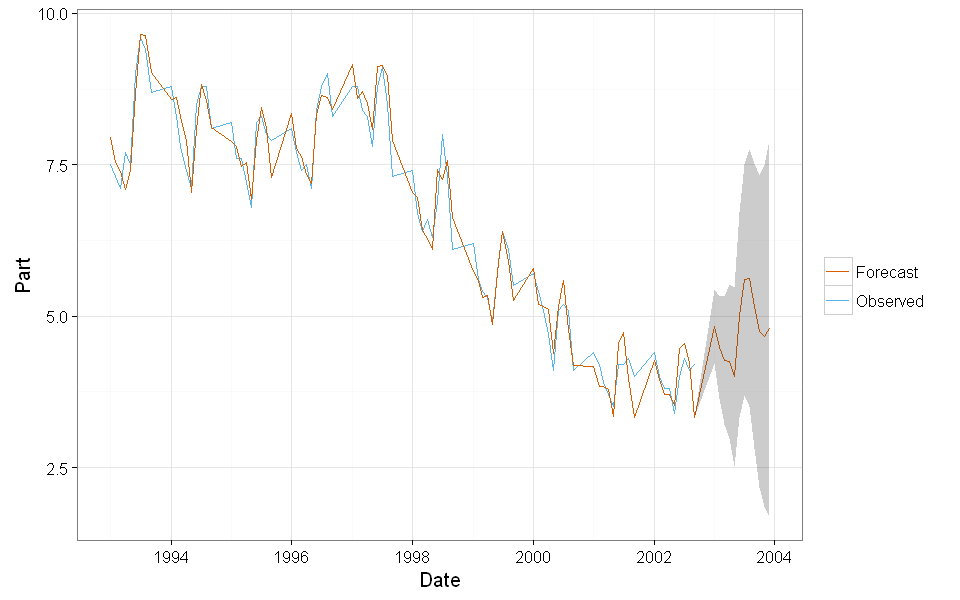

In [146]:
forecast_mean <- hw_model$mean
forecast_high <- hw_model$lower[,2]
forecast_low <- hw_model$upper[,2]

predict_data <- data.frame(Date = c(arb_data$Date, seq(as.Date("2003-01-01"), by = "month", length.out = 12)),
                        Part = c(arb_data$Part, rep(NA, 12)),
                        Forecast = c(arb_data$HoltWinters_Fit, forecast_mean),
                        Forecast_low = c(arb_data$HoltWinters_Fit, forecast_low),
                        Forecast_high = c(arb_data$HoltWinters_Fit, forecast_high))
#predict_data

ggplot(predict_data, aes()) +
    geom_line(aes(x = Date, y = Part, color="Observed")) +
    geom_line(aes(x = Date, y = Forecast, color="Forecast")) +
    geom_ribbon(aes(x = Date, ymin=Forecast_low, ymax=Forecast_high), alpha=.25) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Forecast="#D55E00")) +
    theme_bw()

[1] 1.887763

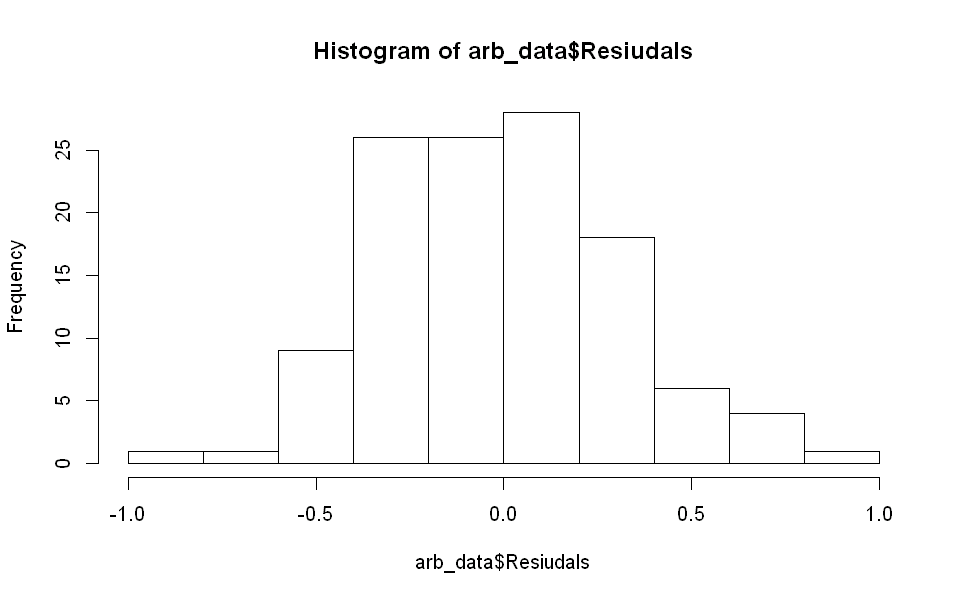

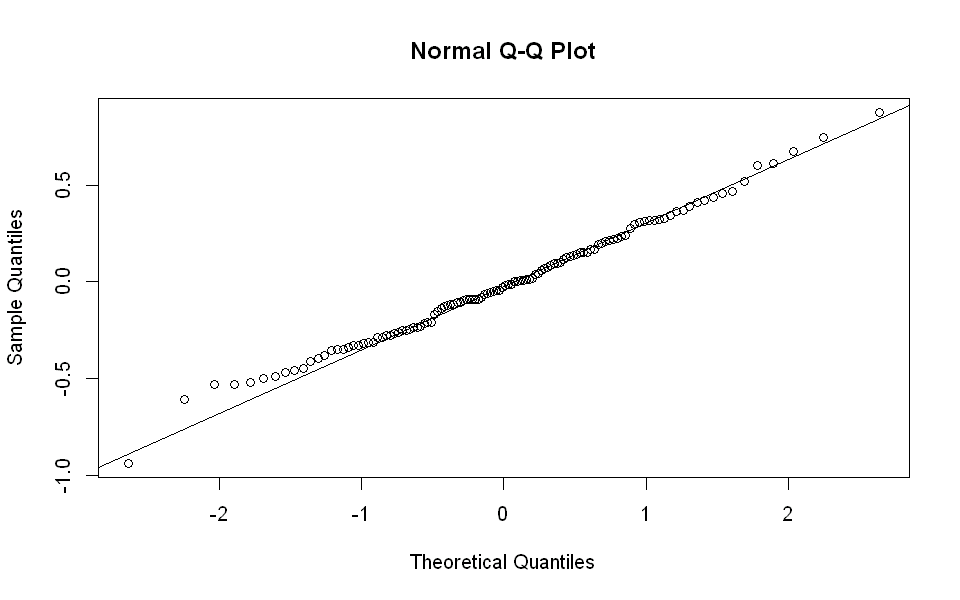

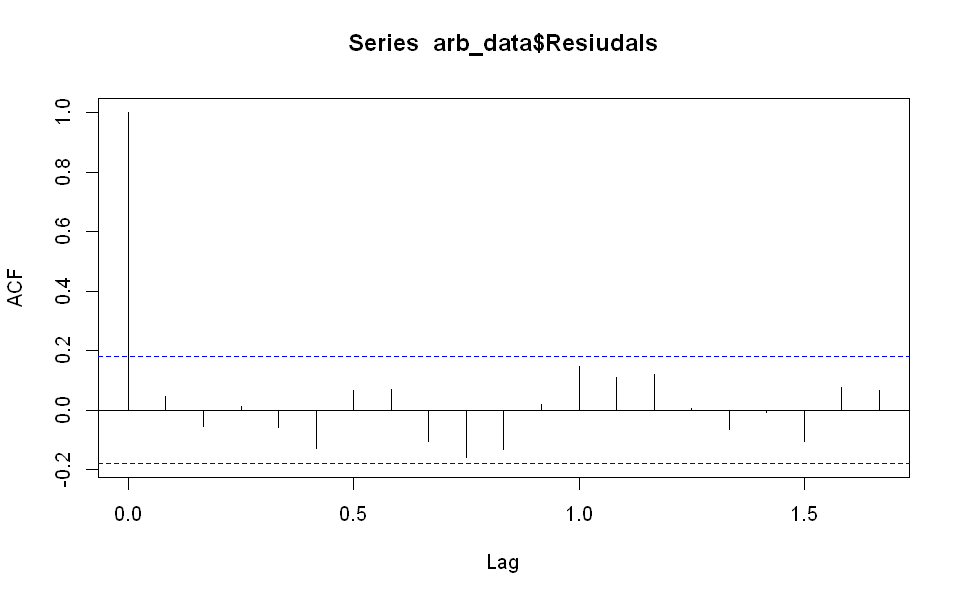

In [147]:
durbinWatsonTest(as.vector(arb_data$Resiudals))

hist(arb_data$Resiudals)
qqnorm(arb_data$Resiudals)
qqline(arb_data$Resiudals)
acf(arb_data$Resiudals)

Durbin-watson ~ 2 => Ingen/liten autokorrelation

SACen ser bra ut och visar inga tecken på autokorrelation

Uppgift 2

In [83]:
tu_data <- read.csv2("tu_foreign_visitors_93-04.csv")
tu_data$Month <- sapply(tu_data$Month, FUN = function(x) { ifelse( length(x) == 2, x, paste("0", x, sep = ""))})
tu_data$Date <- paste(tu_data$Year,tu_data$Month, "01", sep = "-")
tu_data$Date <- as.Date(tu_data$Date, format = "%Y-%m-%d")
head(tu_data)

,Year,Month,Quantity,Date
1,1993,01,213998,1993-01-01
2,1993,02,275392,1993-02-01
3,1993,03,346087,1993-03-01
4,1993,04,580750,1993-04-01
5,1993,05,799651,1993-05-01
6,1993,06,682073,1993-06-01


Warning message:
: Removed 35 rows containing missing values (geom_path).

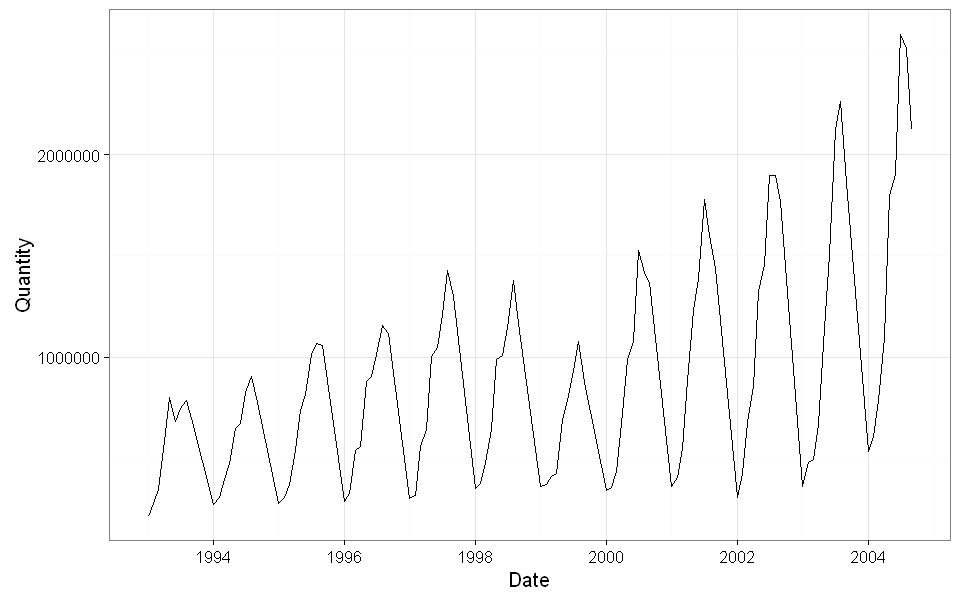

In [86]:
ggplot(tu_data, aes(group = 1)) +
    geom_line(aes(x = Date, y = Quantity)) +
    theme_bw()


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(x = tu_ts, h = 12, seasonal = "multiplicative", alpha = 0.75,  

 Call:
     beta = 0.1, gamma = 0.2) 

  Smoothing parameters:
    alpha = 0.75 
    beta  = 0.1 
    gamma = 0.2 

  Initial states:
    l = 622447.5137 
    b = 485.268 
    s=0.4631 0.5766 1.186 1.4535 1.6279 1.5628
           1.3896 1.3618 0.8885 0.6436 0.4609 0.3857

  sigma:  0.1148

     AIC     AICc      BIC 
3973.520 3976.341 4012.037 

Error measures:
                   ME     RMSE      MAE        MPE    MAPE      MASE
Training set 3717.999 92959.82 67636.71 -0.4240302 8.91077 0.4880347
                     ACF1
Training set -0.002589102

Forecasts:
         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
Dec 2004       761175.9  649220.2  873131.7 589954.367  932397.5
Jan 2005       622146.3  502490.8  741801.8 439148.947  805143.6
Feb 2005       750282.3  573132.1  927432.5 479354.5

Warning message:
: Removed 35 rows containing missing values (geom_path).Warning message:
: Removed 35 rows containing missing values (geom_path).

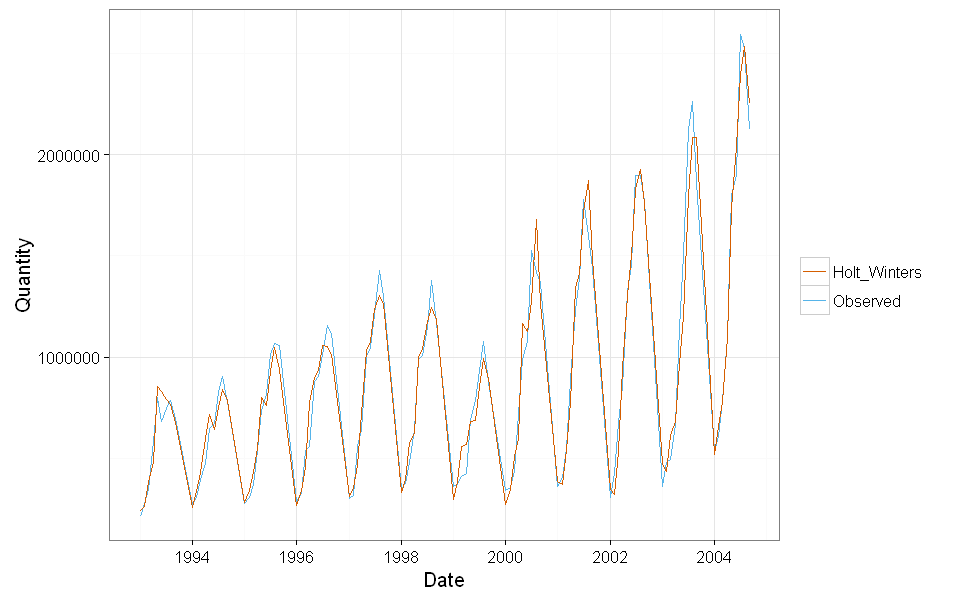

In [167]:
#help(holt)
tu_ts <- ts(tu_data$Quantity, start=c(1993, 01), end=c(2004, 11), frequency=12)
tu_hw_model <- hw(tu_ts, h = 12, seasonal = "multiplicative", alpha = 0.75, beta = 0.1, gamma = 0.20)
summary(tu_hw_model)
tu_data$HoltWinters_Fit <- tu_hw_model$fitted
#tu_data$Resiudals <- tu_data$Quantity / tu_hw_model$fitted
tu_data$Resiudals <- tu_hw_model$residuals

ggplot(tu_data, aes()) +
    geom_line(aes(x = Date, y = Quantity, color="Observed")) +
    geom_line(aes(x = Date, y = HoltWinters_Fit, color="Holt_Winters")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Holt_Winters="#D55E00")) +
    theme_bw()

Warning message:
: Removed 47 rows containing missing values (geom_path).Warning message:
: Removed 35 rows containing missing values (geom_path).

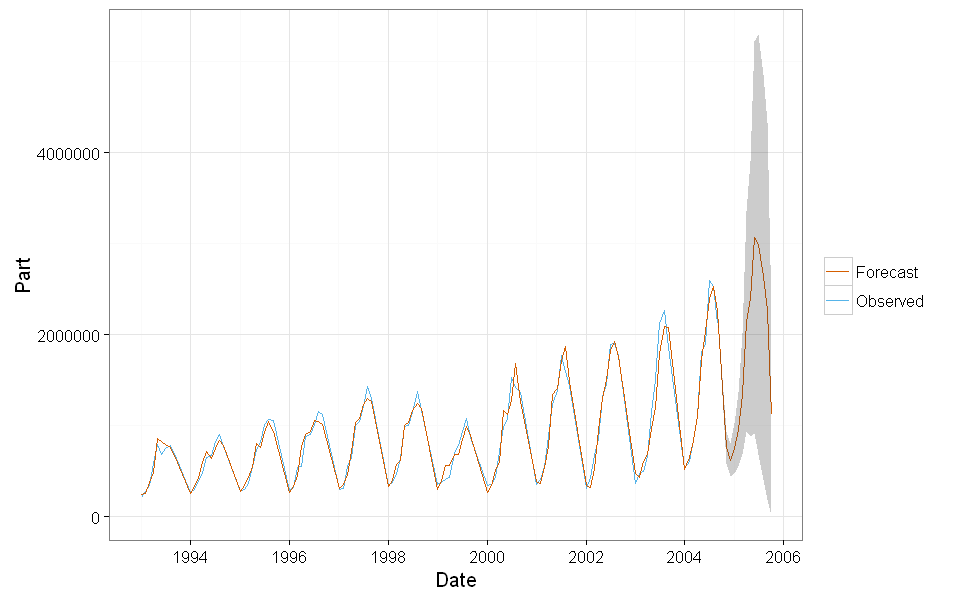

In [165]:
forecast_mean <- tu_hw_model$mean
forecast_high <- tu_hw_model$lower[,2]
forecast_low <- tu_hw_model$upper[,2]

tu_predict_data <- data.frame(Date = c(tu_data$Date, seq(as.Date("2004-11-01"), by = "month", length.out = 12)),
                        Part = c(tu_data$Quantity, rep(NA, 12)),
                        Forecast = c(tu_data$HoltWinters_Fit, forecast_mean),
                        Forecast_low = c(tu_data$HoltWinters_Fit, forecast_low),
                        Forecast_high = c(tu_data$HoltWinters_Fit, forecast_high))
#predict_data

ggplot(tu_predict_data, aes()) +
    geom_line(aes(x = Date, y = Part, color="Observed")) +
    geom_line(aes(x = Date, y = Forecast, color="Forecast")) +
    geom_ribbon(aes(x = Date, ymin=Forecast_low, ymax=Forecast_high), alpha=.25) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Forecast="#D55E00")) +
    theme_bw()

Prognosen ser rimlig ut, men predictions intervallet blir extremt stort..?

[1] 1.958139

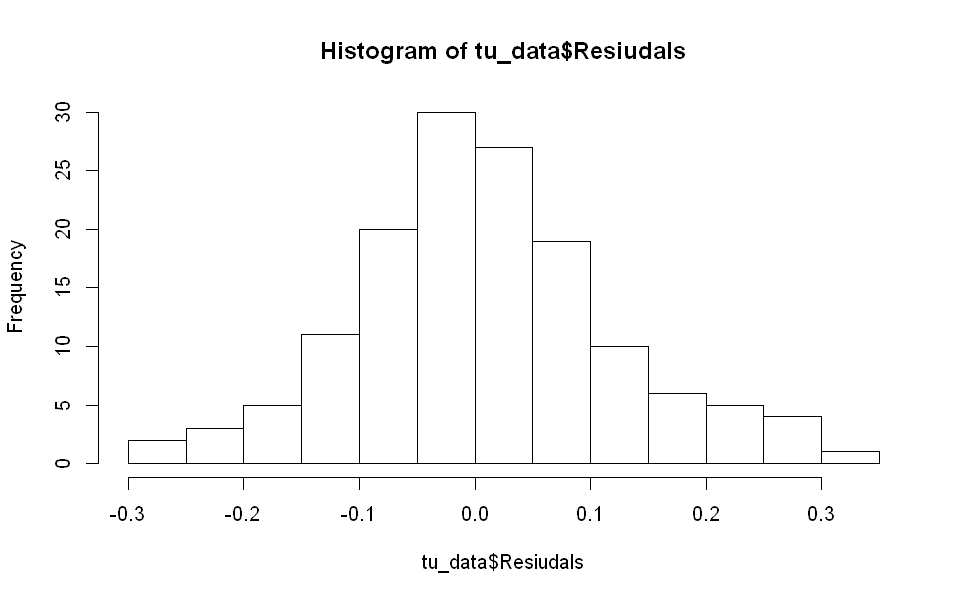

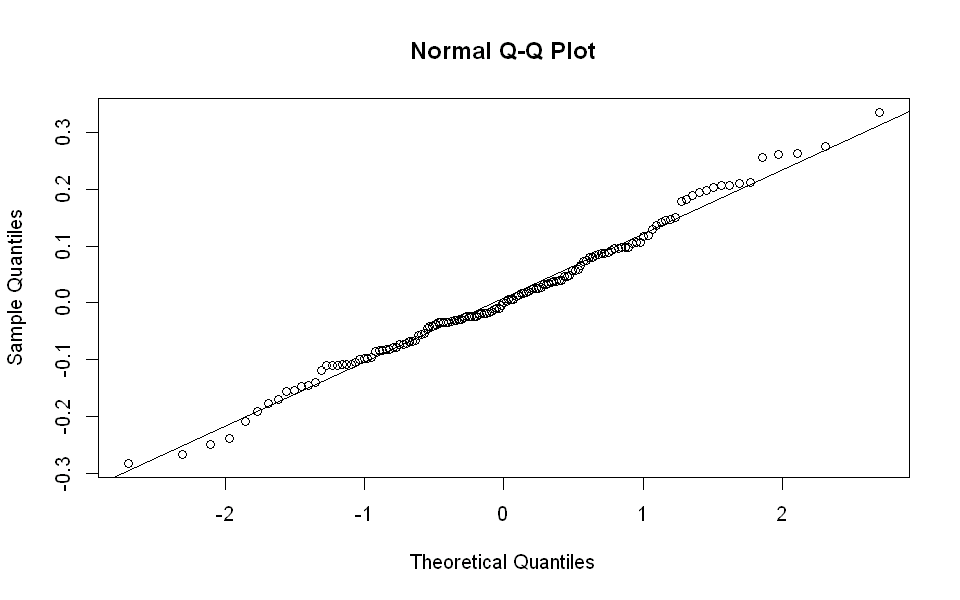

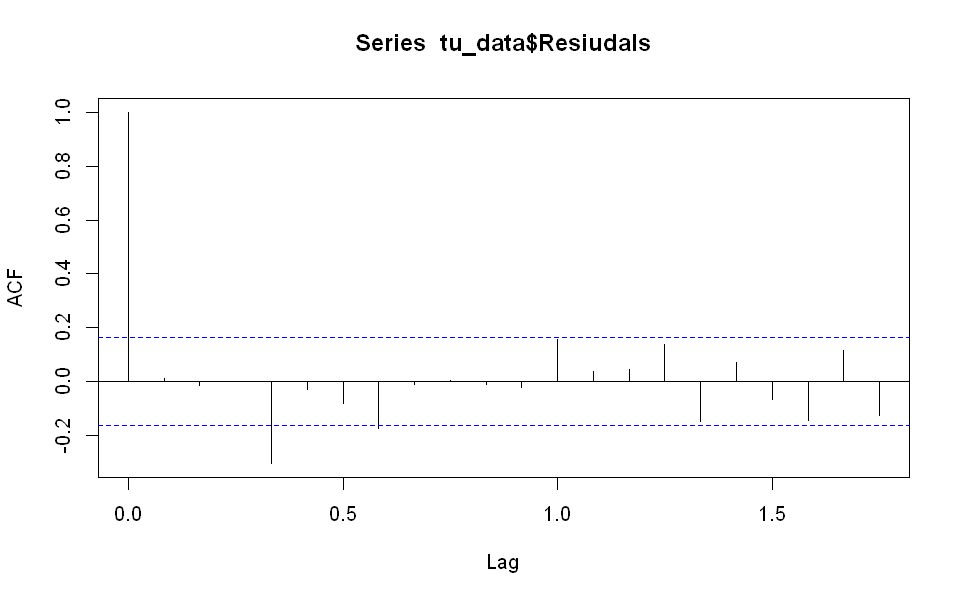

In [168]:
durbinWatsonTest(as.vector(tu_data$Resiudals))

hist(tu_data$Resiudals)
qqnorm(tu_data$Resiudals)
qqline(tu_data$Resiudals)
acf(tu_data$Resiudals)

Durbin-watson ~ 2 => Ingen autokorrelation

SACen ser "OK" ut och visar endast små tecken på autokorrelation